# Preprocessing

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

We import and preapare the data for use.

In [159]:
df = pd.read_csv('../data/telecom_sales_data.csv')
df.head()

,Unnamed: 0,marketing_score,competition_index,customer_satisfaction,purchasing_power_index,weather_condition,tech_event,5g_phase,store_traffic,public_transport,city,jPhone_Pro_revenue,Kaggle_Pixel_5_revenue,Planet_SX_revenue
0,2019-01-01,100.00,50.00,85.0,120.00,Bad,NaN,Pre-5G,0.02,Hub,Paris,122182.54,68709.20,36032.11
1,2019-01-02,100.09,50.52,85.0,120.09,Good,NaN,Pre-5G,1.08,Good,Paris,146473.79,73935.56,44180.21
2,2019-01-03,100.18,51.04,85.0,120.17,Moderate,NaN,Pre-5G,-0.24,Limited,Paris,129647.90,75375.54,41112.52
3,2019-01-04,100.27,51.56,85.0,120.26,Moderate,NaN,Pre-5G,-0.13,Poor,Paris,137621.01,85213.00,46222.99
4,2019-01-05,100.36,52.08,85.0,120.34,Bad,NaN,Pre-5G,0.06,Limited,Paris,194936.87,89281.49,38312.08


In [160]:
# rename first column to 'date'
df.rename(columns={'Unnamed: 0': 'date'}, inplace=True)

# convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# for ease of use
jphone = 'jPhone_Pro_revenue'
kaggle = 'Kaggle_Pixel_5_revenue'
planet = 'Planet_SX_revenue'

# remove nan errors
df['tech_event'] = df['tech_event'].fillna('')


For the time being, we will use Paris as the city of interest.

In [161]:
df_paris = df[df['city'] == 'Paris'].drop(columns=['city','date']).dropna()
df_paris

,marketing_score,competition_index,customer_satisfaction,purchasing_power_index,weather_condition,tech_event,5g_phase,store_traffic,public_transport,jPhone_Pro_revenue,Kaggle_Pixel_5_revenue,Planet_SX_revenue
0,100.00,50.00,85.00,120.00,Bad,,Pre-5G,0.02,Hub,122182.54,68709.20,36032.11
1,100.09,50.52,85.00,120.09,Good,,Pre-5G,1.08,Good,146473.79,73935.56,44180.21
2,100.18,51.04,85.00,120.17,Moderate,,Pre-5G,-0.24,Limited,129647.90,75375.54,41112.52
3,100.27,51.56,85.00,120.26,Moderate,,Pre-5G,-0.13,Poor,137621.01,85213.00,46222.99
4,100.36,52.08,85.00,120.34,Bad,,Pre-5G,0.06,Limited,194936.87,89281.49,38312.08
...,...,...,...,...,...,...,...,...,...,...,...,...
2187,118.12,64.27,89.76,119.74,Moderate,,Mature-5G,1.22,Hub,252440.94,132907.52,61902.41
2188,118.30,64.38,89.76,119.83,Moderate,,Mature-5G,1.34,Poor,259053.84,125443.71,87885.37
2189,118.48,64.41,89.77,119.91,Moderate,,Mature-5G,0.78,Hub,311352.33,121312.09,70433.24
2190,118.66,64.38,89.77,120.00,Bad,,Mature-5G,0.78,Limited,178874.97,90681.10,68820.85


We observe outliers in the target data, however we must evaluate wether they are too many to delete.

In [164]:
# fransform cathegorical data to dummies
cath_var = ['weather_condition','tech_event','5g_phase','public_transport']

df_paris_dummies = pd.get_dummies(df_paris[cath_var], drop_first=True)
df_paris = df_paris.drop(cath_var, axis=1)
df_paris = pd.concat([df_paris, df_paris_dummies], axis=1)

df_paris

,marketing_score,competition_index,customer_satisfaction,purchasing_power_index,store_traffic,jPhone_Pro_revenue,Kaggle_Pixel_5_revenue,Planet_SX_revenue,weather_condition_Good,weather_condition_Moderate,tech_event_Major Launch,tech_event_Tech Show,5g_phase_Mature-5G,5g_phase_Mid-5G,5g_phase_Pre-5G,public_transport_Hub,public_transport_Limited,public_transport_Poor
0,100.00,50.00,85.00,120.00,0.02,122182.54,68709.20,36032.11,False,False,False,False,False,False,True,True,False,False
1,100.09,50.52,85.00,120.09,1.08,146473.79,73935.56,44180.21,True,False,False,False,False,False,True,False,False,False
2,100.18,51.04,85.00,120.17,-0.24,129647.90,75375.54,41112.52,False,True,False,False,False,False,True,False,True,False
3,100.27,51.56,85.00,120.26,-0.13,137621.01,85213.00,46222.99,False,True,False,False,False,False,True,False,False,True
4,100.36,52.08,85.00,120.34,0.06,194936.87,89281.49,38312.08,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,118.12,64.27,89.76,119.74,1.22,252440.94,132907.52,61902.41,False,True,False,False,True,False,False,True,False,False
2188,118.30,64.38,89.76,119.83,1.34,259053.84,125443.71,87885.37,False,True,False,False,True,False,False,False,False,True
2189,118.48,64.41,89.77,119.91,0.78,311352.33,121312.09,70433.24,False,True,False,False,True,False,False,True,False,False
2190,118.66,64.38,89.77,120.00,0.78,178874.97,90681.10,68820.85,False,False,False,False,True,False,False,False,True,False


Now we normalise our data

In [165]:
df_paris_cols = df_paris.columns
normaliser = MinMaxScaler()
df_paris = normaliser.fit_transform(df_paris)
pd.DataFrame(df_paris, columns=df_paris_cols).describe()

,marketing_score,competition_index,customer_satisfaction,purchasing_power_index,store_traffic,jPhone_Pro_revenue,Kaggle_Pixel_5_revenue,Planet_SX_revenue,weather_condition_Good,weather_condition_Moderate,tech_event_Major Launch,tech_event_Tech Show,5g_phase_Mature-5G,5g_phase_Mid-5G,5g_phase_Pre-5G,public_transport_Hub,public_transport_Limited,public_transport_Poor
count,1641.000000,1641.000000,1641.000000,1641.000000,1641.000000,1641.000000,1641.000000,1641.000000,1641.000000,1641.000000,1641.000000,1641.000000,1641.000000,1641.000000,1641.000000,1641.000000,1641.000000,1641.000000
mean,0.669054,0.511042,0.694211,0.498513,0.454566,0.333774,0.380517,0.429925,0.345521,0.455210,0.003656,0.003656,0.415600,0.157831,0.255941,0.360146,0.188909,0.272395
std,0.191363,0.349357,0.222051,0.352047,0.157737,0.135220,0.144134,0.163294,0.475683,0.498142,0.060375,0.060375,0.492975,0.364693,0.436522,0.480189,0.391556,0.445328
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.579468,0.165510,0.551646,0.150000,0.344214,0.245714,0.280503,0.317367,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.688608,0.517349,0.726447,0.491000,0.454006,0.336006,0.383202,0.431723,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.797920,0.859820,0.863791,0.850000,0.563798,0.420055,0.475050,0.535277,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We now search for outliers

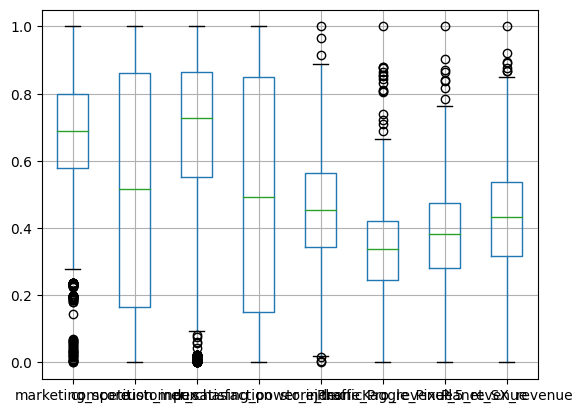

In [167]:
df_paris_df = pd.DataFrame(df_paris, columns=df_paris_cols)
cont_cols = ['marketing_score', 'competition_index', 'customer_satisfaction',
       'purchasing_power_index', 'store_traffic', 'jPhone_Pro_revenue',
       'Kaggle_Pixel_5_revenue', 'Planet_SX_revenue']
df_paris_df[cont_cols].boxplot()
plt.show()

Now, given the presence of a number of outliers, we must ask wether the proportion of outliers is too high to delete them.

In [178]:
IQR = df_paris_df.quantile(0.75) - df_paris_df.quantile(0.25)

# remove outliers
bool = (~((df_paris_df < (df_paris_df.quantile(0.25) - 1.5 * IQR)) | (df_paris_df > (df_paris_df.quantile(0.75) + 1.5 * IQR))).any(axis=1))
bool.sum()/len(bool)

0.5965874466788543

From these we see that the proportion of outliers is too high, so we will not delete them. Now, we can proceed to making a model.

# Modeling